In [1]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, MaxPooling2D, Flatten,
                                     Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Network parameters
NUM_CLASSES = 10
#INPUT IMAGE DIMENSIONS
IMG_ROWS, IMG_COLS, IMG_CHANNELS =32, 32, 3
INPUT_SHAPE= (IMG_ROWS, IMG_COLS, IMG_CHANNELS)

In [3]:
# Load the Fashion MNIST dataset
cifar_data = tf.keras.datasets.cifar10
# Split between 50,000 train samples and 10,000 test samples
(train_images, train_labels), (test_images, test_labels) = cifar_data.load_data()
#Reshape
train_images = train_images.reshape(50000, IMG_ROWS, IMG_COLS, IMG_CHANNELS)
test_images = test_images.reshape(10000, IMG_ROWS, IMG_COLS, IMG_CHANNELS)
train_images, test_images = train_images/255.0, test_images/255.0


170498071/170498071 [==============================] - 3s 0us/step


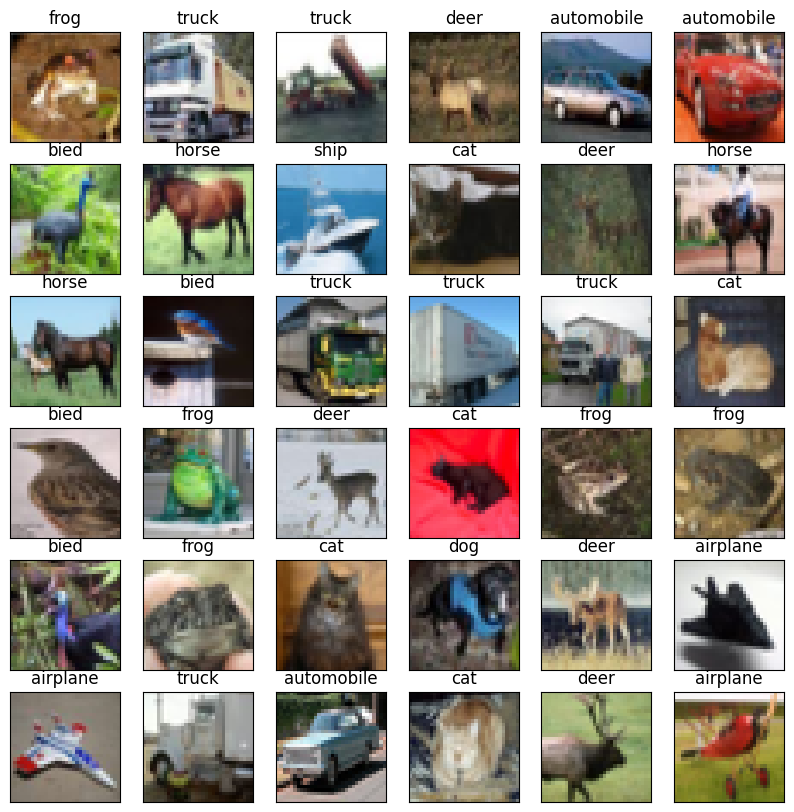

In [4]:
# Create a dictionary for each type of label
labels = {0 : "airplane", 1: "automobile", 2: "bied", 3: "cat", 4: "deer",
          5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

plt.figure(figsize=(10, 10))
for i in range(36):
  plt.subplot(6, 6, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i].reshape((IMG_ROWS,IMG_COLS, IMG_CHANNELS)))
  label_index = np.ndarray.item(train_labels[i])
  plt.title(labels[label_index])
plt.show()


In [5]:
# One-hot representation of labels
train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)


In [6]:
#define the architecture of our convolutional neural network,including dropout
#layers and 12 regularization

class cnn_fmnist:
    @staticmethod
    def build(input_shape, classes, use_l2_reg=False, l2_loss_lambda=0.00025):
        l2 = regularizers.l2(l2_loss_lambda) if use_l2_reg else None

        model = Sequential([

        # CONV => RELU => POOL

        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',
               kernel_regularizer=l2, input_shape= input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        # CONV => RELU => POOL
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',
               kernel_regularizer=l2) ,
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),

        # CONV => RELU => POOL

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same',
               kernel_regularizer=l2),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.4),

        Flatten(),
        Dropout (0.4),

        Dense(512, activation='relu',kernel_regularizer=l2) ,
        Dropout (0.4),

        Dense(256, activation='relu', kernel_regularizer=l2),
        Dropout (0.2),

        Dense(NUM_CLASSES, activation='softmax')
        ])
        return model


In [7]:
# initialize the optimizer and model
model = cnn_fmnist.build(input_shape=INPUT_SHAPE, classes=NUM_CLASSES,
                         use_l2_reg=True,l2_loss_lambda=0.0015)

adam = Adam(learning_rate=0.0001)

model.compile(loss="categorical_crossentropy", optimizer=adam,
               metrics=["accuracy"])
model.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 64)        2

In [8]:
BATCH_SIZE = 128
EPOCHS = 50
VALIDATION_SPLIT = 0.2 # how much of the training set is reserved for validation


In [9]:
history=model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data = (test_images, test_labels), verbose=1)


Epoch 1/50
391/391 [==============================] - 19s 15ms/step - loss: 4.5037 - accuracy: 0.1925 - val_loss: 5.2194 - val_accuracy: 0.1791
Epoch 2/50
391/391 [==============================] - 5s 12ms/step - loss: 3.8034 - accuracy: 0.2778 - val_loss: 3.5396 - val_accuracy: 0.3721
Epoch 3/50
391/391 [==============================] - 5s 12ms/step - loss: 3.5392 - accuracy: 0.3324 - val_loss: 3.2748 - val_accuracy: 0.4234
Epoch 4/50
391/391 [==============================] - 5s 13ms/step - loss: 3.3300 - accuracy: 0.3751 - val_loss: 3.1091 - val_accuracy: 0.4481
Epoch 5/50
391/391 [==============================] - 5s 12ms/step - loss: 3.1389 - accuracy: 0.4083 - val_loss: 2.9080 - val_accuracy: 0.4819
Epoch 6/50
391/391 [==============================] - 5s 12ms/step - loss: 2.9680 - accuracy: 0.4351 - val_loss: 2.9303 - val_accuracy: 0.4601
Epoch 7/50
391/391 [==============================] - 5s 12ms/step - loss: 2.8145 - accuracy: 0.4549 - val_loss: 2.5980 - val_accuracy: 0.514

In [10]:
# Evaluate the model
score = model.evaluate(test_images, test_labels)
print("Test SCORE: ", score[0])
print("\nTest accuracy: ", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.8259 - accuracy: 0.7917
Test SCORE:  0.8259026408195496

Test accuracy:  0.791700005531311


Text(0.5, 1.0, 'Train - Accuracy')

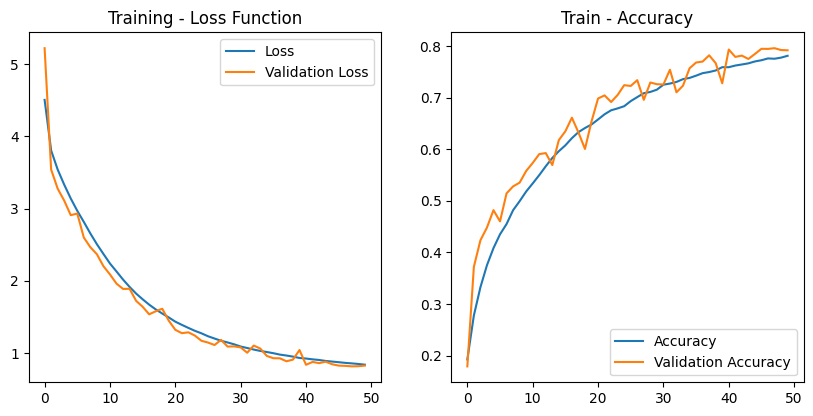

In [11]:

# Plot the loss and accuracy functions for the training and validation sets



plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.title('Train - Accuracy')
